In [86]:
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

bstn = datasets.load_boston()
train_input, test_input, train_target, test_target = train_test_split(bstn.data, bstn.target, random_state = 1)

**<font size="2px"> 일반 선형회귀 </font>**


In [87]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(f'lr train score : {lr.score(train_input, train_target)}')
print(f'lr test score : {lr.score(test_input, test_target)}')

lr train score : 0.7168057552393374
lr test score : 0.7789410172622863


**<font size="2px"> 랏소 회귀 </font>**

In [88]:
lasso = Lasso()
lasso.fit(train_input, train_target)
print(f'Lasso train score : {lasso.score(train_input, train_target)}')
print(f'Lasso test score : {lasso.score(test_input, test_target)}')

Lasso train score : 0.6481706225568704
Lasso test score : 0.662198077052326


**<font size="2px"> 릿지 회귀 </font>**

In [89]:
ridge = Ridge()
ridge.fit(train_input, train_target)
print(f'Ridge train score : {ridge.score(train_input, train_target)}')
print(f'Ridge test score : {ridge.score(test_input, test_target)}')

Ridge train score : 0.7130645548355914
Ridge test score : 0.784777431688241


**<font size="2px"> 정규화 및 재시도 - 릿지 회귀, 랏소 회귀, 선형 회귀 </font>**

In [133]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(f'Lasso train score : {lasso.score(train_scaled, train_target)}')
print(f'Lasso test score : {lasso.score(test_scaled, test_target)}')
print()

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(f'Ridge train score : {ridge.score(train_scaled, train_target)}')
print(f'Ridge test score : {ridge.score(test_scaled, test_target)}')


Lasso train score : 0.6350155734139249
Lasso test score : 0.6694154853500853

Ridge train score : 0.7167789345572821
Ridge test score : 0.7789704562726603


**<font size="2px"> 릿지 회귀에서 최적의 알파값 찾기
 </font>**

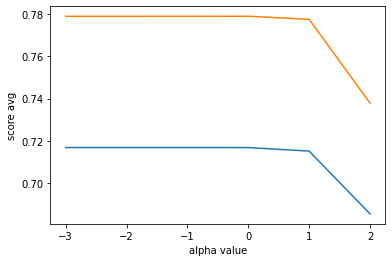

[0.71680576 0.71680575 0.71680547 0.71677893 0.71511703 0.68536214]
[0.77894108 0.77894162 0.77894674 0.77897046 0.77751084 0.7378492 ]


In [138]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = np.zeros(len(alpha_list))
test_score = np.zeros(len(alpha_list))
i = 0
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score[i] = ridge.score(train_scaled, train_target)
  test_score[i] = ridge.score(test_scaled, test_target)
  i += 1

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha value")
plt.ylabel("score avg")
plt.show()

print(train_score)
print(test_score)

In [92]:
# 최적은 아니지만, 상단의 산점도에서 그나마 최적인 0.001

ridge = Ridge(alpha = 0.001)
ridge.fit(train_scaled, train_target)
print(f'Ridge train score : {ridge.score(train_scaled, train_target)}')
print(f'Ridge test score : {ridge.score(test_scaled, test_target)}')

Ridge train score : 0.7168057552107168
Ridge test score : 0.7789410777435901


**<font size="2px"> 랏소 회귀에서 최적의 알파값 찾기 </font>**


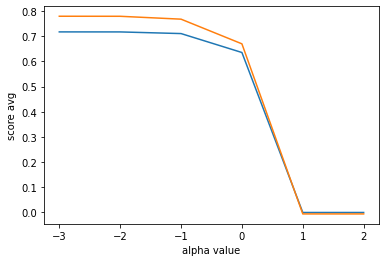

[0.71680473 0.71670388 0.71014866 0.63501557 0.         0.        ]
[ 0.77893354  0.77876215  0.7673448   0.66941549 -0.00567691 -0.00567691]


In [136]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = np.zeros(len(alpha_list))
test_score = np.zeros(len(alpha_list))
i = 0
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score[i] = lasso.score(train_scaled, train_target)
  test_score[i] = lasso.score(test_scaled, test_target)
  i += 1

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha value")
plt.ylabel("score avg")
plt.show()

print(train_score)
print(test_score)

In [139]:
# 최적은 아니지만, 상단의 산점도에서 그나마 최적인 0.001

lasso = Lasso(alpha = 0.001)
lasso.fit(train_scaled, train_target)
print(f'Lasso train score : {lasso.score(train_scaled, train_target)}')
print(f'Lasso test score : {lasso.score(test_scaled, test_target)}')

Lasso train score : 0.716804734158175
Lasso test score : 0.778933541111184


**<font size="2px"> 특성공학을 통한 선형회귀 </font>**


In [95]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr_poly = LinearRegression()
lr_poly.fit(train_poly, train_target)

print(f'lr_poly train score : {lr_poly.score(train_poly, train_target)}')
print(f'lr_poly test score : {lr_poly.score(test_poly, test_target)}')

lr_poly train score : 0.9281262443260944
lr_poly test score : 0.8962092351564832


In [115]:
# 랏소 회귀, 릿지 회귀 전 표준화 및 정규화
ss.fit(train_poly)
train_poly_scaled = ss.transform(train_poly)
test_poly_scaled = ss.transform(test_poly)

**<font size="2px"> 특성공학을 이용하여 릿지 회귀의 최적 알파값 찾기 </font>**


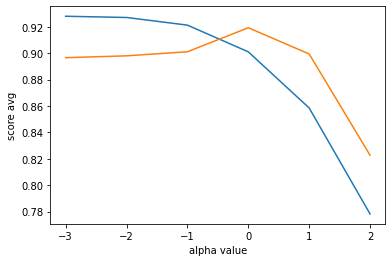

[0.9280515  0.92711172 0.92131704 0.9010716  0.85854733 0.77825056]
[0.89664665 0.89804985 0.90113548 0.91933594 0.89946661 0.82273799]


In [113]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = np.zeros(len(alpha_list))
test_score = np.zeros(len(alpha_list))
i = 0
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_poly_scaled, train_target)
  train_score[i] = ridge.score(train_poly_scaled, train_target)
  test_score[i] = ridge.score(test_poly_scaled, test_target)
  i += 1

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha value")
plt.ylabel("score avg")
plt.show()

print(train_score)
print(test_score)

**<font size="2px"> 특성공학을 이용하여 랏소 회귀의 최적 알파값 찾기 </font>**


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+03, tolerance: 3.008e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.484e+02, tolerance: 3.008e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


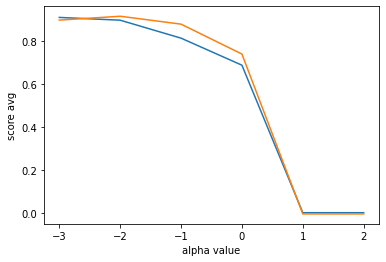

[0.90995757 0.89703245 0.81334053 0.68735948 0.         0.        ]
[ 0.89744044  0.91542764  0.8785841   0.73920665 -0.00567691 -0.00567691]


In [114]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = np.zeros(len(alpha_list))
test_score = np.zeros(len(alpha_list))
i = 0
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_poly_scaled, train_target)
  train_score[i] = lasso.score(train_poly_scaled, train_target)
  test_score[i] = lasso.score(test_poly_scaled, test_target)
  i += 1

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha value")
plt.ylabel("score avg")
plt.show()

print(train_score)
print(test_score)

In [135]:
# 정리
lr_poly = LinearRegression()
lr_poly.fit(train_poly_scaled, train_target)
print(f'lr_poly train score : {lr_poly.score(train_poly_scaled, train_target)}')
print(f'lr_poly test score : {lr_poly.score(test_poly_scaled, test_target)}')
print()

print(f'릿지회귀의 베스트 알파 값 : 0.1')
ridge = Ridge(alpha = 0.1)
ridge.fit(train_poly_scaled, train_target)
print(f'Ridge train score : {ridge.score(train_poly_scaled, train_target)}')
print(f'Ridge test score : {ridge.score(test_poly_scaled, test_target)}')
print()

print(f'랏소회귀의 베스트 알파 값 : 0.001')
lasso = Lasso(alpha = 0.001)
lasso.fit(train_poly_scaled, train_target)
print(f'lasso train score : {lasso.score(train_poly_scaled, train_target)}')
print(f'lasso test score : {lasso.score(test_poly_scaled, test_target)}')
print()

lr_poly train score : 0.9281262443260946
lr_poly test score : 0.8962092351509705

릿지회귀의 베스트 알파 값 : 0.1
Ridge train score : 0.9213170354029548
Ridge test score : 0.901135481806084

랏소회귀의 베스트 알파 값 : 0.001
lasso train score : 0.9099575670320065
lasso test score : 0.8974404447600711



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+03, tolerance: 3.008e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


**<font size="2px"> 릿지 회귀, 랏소 회귀, 선형 회귀에 대한 총 계수 산점도 </font>**

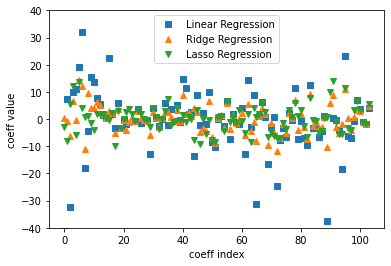

In [129]:
warnings.simplefilter(action='ignore', category=RuntimeWarning) 
plt.plot(lr_poly.coef_, 's', label='Linear Regression')
plt.plot(ridge.coef_, '^', label='Ridge Regression')
plt.plot(lasso.coef_, 'v', label='Lasso Regression')

plt.xlabel('coeff index'); 
plt.ylabel('coeff value'); 
plt.ylim(-40, 40)
plt.legend()
plt.show()

#print(lr_poly.intercept_, ridge.intercept_, lasso.intercept_)
#print(train_poly_scaled.shape, sum(lasso.coef_== 0))

<font size="2px"> 랏소 계수 값들의 절댓값이 가장 작고, 선형 회귀의 계수 값들이 절댓값이 가장 큰 것을 볼 수 있다, 계수의 절댓값이 클수록 상치/에러값으로 부터 영향을 크게 받지 않는 건장한 통계량을 의미한다. </font>